TASK 3: A/B HYPOTHESIS TESTING FOR RISK DRIVERS
Data loaded successfully. Shape: (1000096, 56)

DATA PREPARATION FOR HYPOTHESIS TESTING
Total policies: 1,000,096
Policies with claims: 2,788 (0.28%)
Average claim amount (when claim occurs): R23,273.39
Overall portfolio margin: R-2,956,005.40

HYPOTHESIS 1: RISK DIFFERENCES ACROSS PROVINCES
H₀: There are no risk differences across provinces
KPIs: Claim Frequency, Claim Severity

Analyzing 9 provinces with sufficient data:
['Gauteng', 'Western Cape', 'KwaZulu-Natal', 'North West', 'Mpumalanga', 'Eastern Cape', 'Limpopo', 'Free State', 'Northern Cape']

--- Claim Frequency Test (Chi-square) ---
Chi-square statistic: 104.1932
P-value: 0.000000
REJECT H₀: Significant differences in claim frequency across provinces

Post-hoc Analysis - Claim Frequency by Province:
                 mean   count  Difference
Province                                 
Gauteng        0.0034  393863     20.4024
KwaZulu-Natal  0.0028  169781      2.0486
Limpopo      

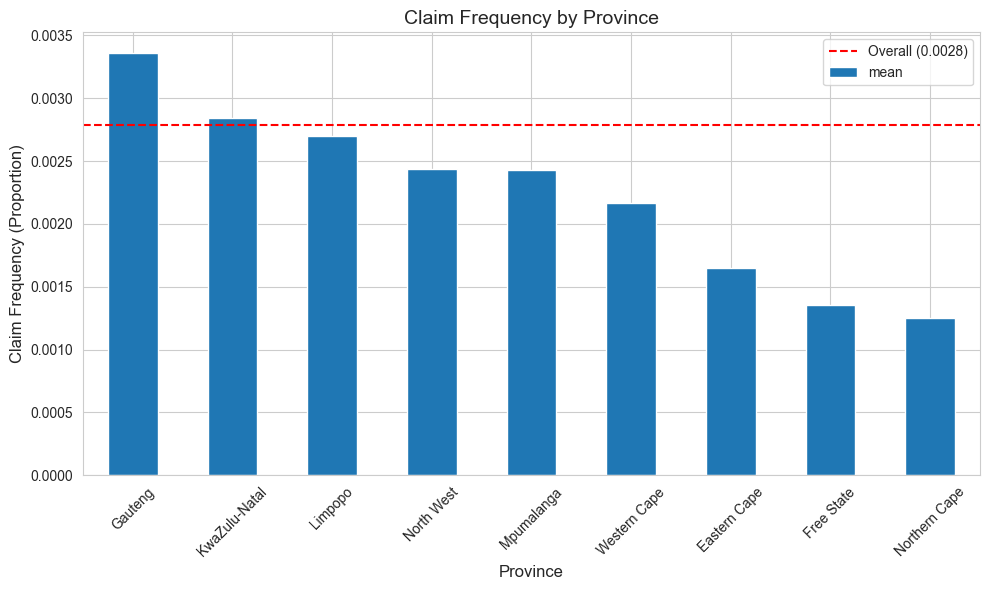


--- Claim Severity Test (ANOVA) ---
F-statistic: 4.8302
P-value: 0.000006
REJECT H₀: Significant differences in claim severity across provinces

Claim Severity by Province:
                   mean       std  count  Difference_Rand  Difference_Pct
Province                                                                 
Free State     32265.66  48382.39     11          8992.27           38.64
KwaZulu-Natal  29609.49  42006.34    483          6336.10           27.22
Western Cape   28095.85  48287.45    370          4822.46           20.72
Eastern Cape   27128.53  51483.68     50          3855.15           16.56
Gauteng        22243.88  36003.40   1322         -1029.51           -4.42
North West     16963.47  33140.46    349         -6309.92          -27.11
Mpumalanga     15979.55  29584.11    128         -7293.83          -31.34
Limpopo        15171.29  27636.48     67         -8102.09          -34.81
Northern Cape  11186.31   9889.44      8        -12087.07          -51.94


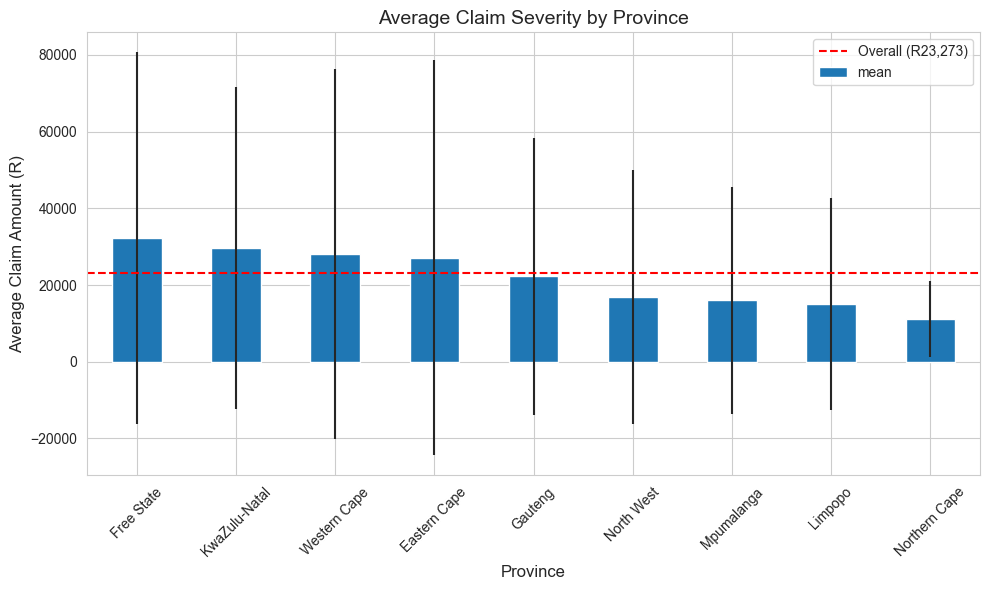


HYPOTHESIS 2: RISK DIFFERENCES BETWEEN ZIP CODES
H₀: There are no risk differences between zip codes
Note: Testing top 10 zip codes by policy count for statistical power

Analyzing top 10 zip codes by policy count:
Total policies in analysis: 312,322
Coverage: 31.2% of total portfolio

--- Claim Frequency Test for Top Zip Codes (Chi-square) ---
Chi-square statistic: 72.6494
P-value: 0.000000
REJECT H₀: Significant differences in claim frequency between zip codes

Top Zip Codes by Claim Frequency:
                mean   count  Risk_Ratio
PostalCode                              
8000        0.004324   11794    1.312491
470         0.004303   10226    1.305973
122         0.004271   49171    1.296276
2000        0.003641  133498    1.104965
2196        0.002896   11048    0.879131
7100        0.002756   10161    0.836390
299         0.002623   25546    0.796048
458         0.002323   13775    0.705092
7784        0.001749   28585    0.530908
7405        0.001566   18518    0.475326


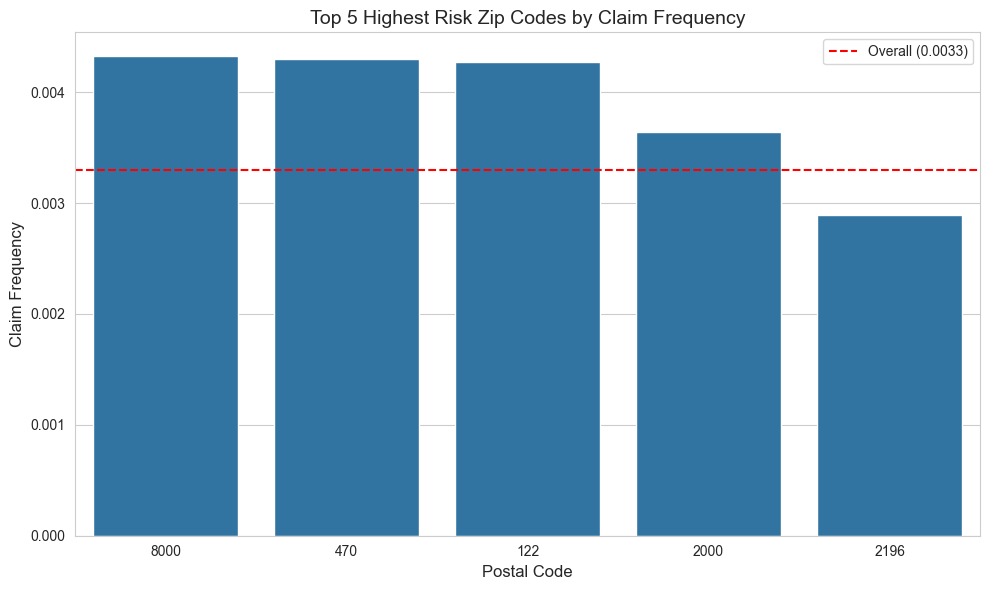


HYPOTHESIS 3: MARGIN DIFFERENCES BETWEEN ZIP CODES
H₀: There is no significant margin (profit) difference between zip codes
KPI: Margin = TotalPremium - TotalClaims

--- Margin Test for Top Zip Codes (ANOVA) ---
F-statistic: 1.0506
P-value: 0.396364
FAIL TO REJECT H₀: No significant differences in margin between zip codes

HYPOTHESIS 4: RISK DIFFERENCES BETWEEN WOMEN AND MEN
H₀: There is no significant risk difference between Women and Men
Note: Filtering for 'Male' and 'Female' categories only

Gender distribution for analysis:
Gender
Male      42817
Female     6755
Name: count, dtype: int64

--- Claim Frequency Test (Chi-square) ---
Chi-square statistic: 0.0037
P-value: 0.951464
FAIL TO REJECT H₀: No significant differences in claim frequency between genders

Claim Frequency by Gender:
            mean  count
Gender                 
Female  0.002073   6755
Male    0.002195  42817

--- Claim Severity Test (t-test) ---
T-statistic: -0.5790
P-value: 0.568029
FAIL TO REJECT H₀: No signi

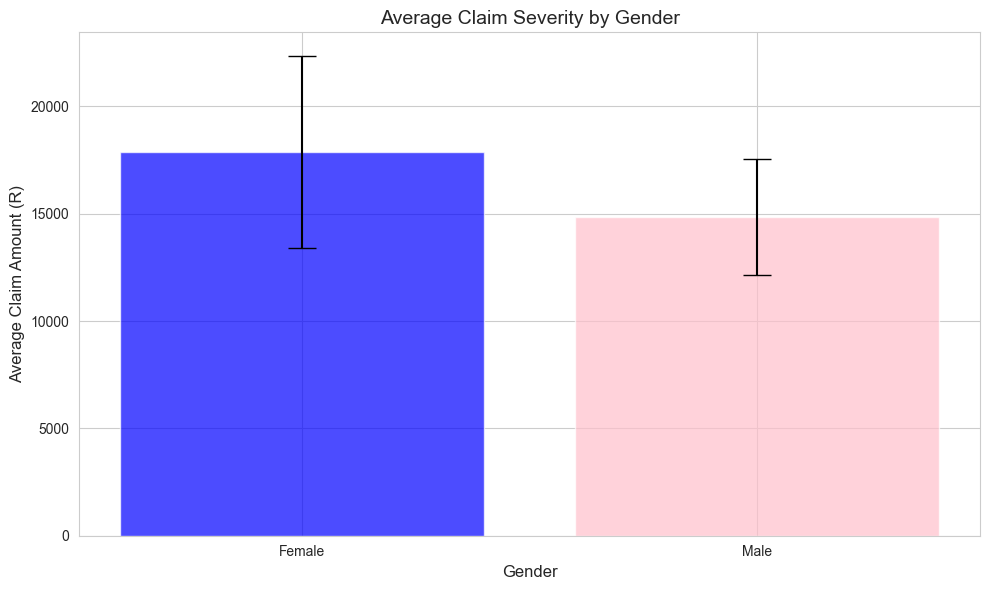


SUMMARY OF HYPOTHESIS TESTING RESULTS
                                        Hypothesis  Test Statistic      P-value            Result
 H₁: Risk differences across provinces (Frequency)      104.193187 5.919067e-19         REJECT H₀
  H₁: Risk differences across provinces (Severity)        4.830166 6.304917e-06         REJECT H₀
H₂: Risk differences between zip codes (Frequency)       72.649411 4.593278e-12         REJECT H₀
          H₃: Margin differences between zip codes        1.050575 3.963641e-01 FAIL TO REJECT H₀
     H₄: Risk differences Women vs Men (Frequency)        0.003705 9.514645e-01 FAIL TO REJECT H₀
      H₄: Risk differences Women vs Men (Severity)       -0.579020 5.680287e-01 FAIL TO REJECT H₀

BUSINESS RECOMMENDATIONS

1. PROVINCE-BASED PRICING:
   ✓ IMPLEMENT regional pricing adjustments. Gauteng has 168% higher claim frequency than Northern Cape.
   ✓ Consider higher premiums in high-risk provinces or discounts in low-risk provinces.

2. ZIP CODE SEGMENTATION:


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind, chi2_contingency, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("=" * 80)
print("TASK 3: A/B HYPOTHESIS TESTING FOR RISK DRIVERS")
print("=" * 80)

# Load the processed data
try:
    df = pd.read_csv('../data/processed/processed_data.csv')
    print(f"Data loaded successfully. Shape: {df.shape}")
except FileNotFoundError:
    print("ERROR: Processed data not found. Please run Task 1 first.")
    exit()

# --- Data Preparation for Hypothesis Testing ---
print("\n" + "=" * 80)
print("DATA PREPARATION FOR HYPOTHESIS TESTING")
print("=" * 80)

# Create necessary metrics
df['ClaimOccurred'] = (df['TotalClaims'] > 0).astype(int)
df['Margin'] = df['TotalPremium'] - df['TotalClaims']

# For severity: average claim amount when claim occurred
df_claims = df[df['TotalClaims'] > 0].copy()

print(f"Total policies: {len(df):,}")
print(f"Policies with claims: {len(df_claims):,} ({len(df_claims)/len(df)*100:.2f}%)")
print(f"Average claim amount (when claim occurs): R{df_claims['TotalClaims'].mean():,.2f}")
print(f"Overall portfolio margin: R{df['Margin'].sum():,.2f}")

# --- Hypothesis 1: Risk Differences Across Provinces ---
print("\n" + "=" * 80)
print("HYPOTHESIS 1: RISK DIFFERENCES ACROSS PROVINCES")
print("=" * 80)
print("H₀: There are no risk differences across provinces")
print("KPIs: Claim Frequency, Claim Severity")

# Get provinces with sufficient data
province_counts = df['Province'].value_counts()
valid_provinces = province_counts[province_counts >= 100].index.tolist()
df_province = df[df['Province'].isin(valid_provinces)].copy()

print(f"\nAnalyzing {len(valid_provinces)} provinces with sufficient data:")
print(valid_provinces)

# 1.1 Test for Claim Frequency differences (Chi-square test)
print("\n--- Claim Frequency Test (Chi-square) ---")
freq_contingency = pd.crosstab(df_province['Province'], df_province['ClaimOccurred'])
chi2, p_freq, dof, expected = chi2_contingency(freq_contingency)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_freq:.6f}")

if p_freq < 0.05:
    print("REJECT H₀: Significant differences in claim frequency across provinces")
    
    # Post-hoc analysis: Compare each province to overall
    overall_freq = df_province['ClaimOccurred'].mean()
    province_stats = df_province.groupby('Province')['ClaimOccurred'].agg(['mean', 'count'])
    province_stats['Difference'] = (province_stats['mean'] - overall_freq) / overall_freq * 100
    
    print("\nPost-hoc Analysis - Claim Frequency by Province:")
    print(province_stats.sort_values('Difference', ascending=False).round(4))
    
    # Visualize
    plt.figure(figsize=(10, 6))
    province_stats.sort_values('mean', ascending=False)['mean'].plot(kind='bar')
    plt.axhline(y=overall_freq, color='r', linestyle='--', label=f'Overall ({overall_freq:.4f})')
    plt.title('Claim Frequency by Province', fontsize=14)
    plt.ylabel('Claim Frequency (Proportion)', fontsize=12)
    plt.xlabel('Province', fontsize=12)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("FAIL TO REJECT H₀: No significant differences in claim frequency across provinces")

# 1.2 Test for Claim Severity differences (ANOVA)
print("\n--- Claim Severity Test (ANOVA) ---")
if len(df_claims) > 0:
    severity_groups = [df_claims[df_claims['Province'] == province]['TotalClaims'].values 
                      for province in valid_provinces 
                      if len(df_claims[df_claims['Province'] == province]) >= 5]
    
    if len(severity_groups) >= 2:
        f_stat, p_sev = f_oneway(*severity_groups)
        print(f"F-statistic: {f_stat:.4f}")
        print(f"P-value: {p_sev:.6f}")
        
        if p_sev < 0.05:
            print("REJECT H₀: Significant differences in claim severity across provinces")
            
            # Calculate mean severity by province
            severity_stats = df_claims.groupby('Province')['TotalClaims'].agg(['mean', 'std', 'count'])
            overall_severity = df_claims['TotalClaims'].mean()
            severity_stats['Difference_Rand'] = severity_stats['mean'] - overall_severity
            severity_stats['Difference_Pct'] = (severity_stats['Difference_Rand'] / overall_severity) * 100
            
            print("\nClaim Severity by Province:")
            print(severity_stats.sort_values('mean', ascending=False).round(2))
            
            # Visualize
            plt.figure(figsize=(10, 6))
            severity_stats.sort_values('mean', ascending=False)['mean'].plot(kind='bar', yerr=severity_stats['std'])
            plt.axhline(y=overall_severity, color='r', linestyle='--', label=f'Overall (R{overall_severity:,.0f})')
            plt.title('Average Claim Severity by Province', fontsize=14)
            plt.ylabel('Average Claim Amount (R)', fontsize=12)
            plt.xlabel('Province', fontsize=12)
            plt.legend()
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        else:
            print("FAIL TO REJECT H₀: No significant differences in claim severity across provinces")
    else:
        print("Insufficient data for severity ANOVA test")

# --- Hypothesis 2: Risk Differences Between Zip Codes ---
print("\n" + "=" * 80)
print("HYPOTHESIS 2: RISK DIFFERENCES BETWEEN ZIP CODES")
print("=" * 80)
print("H₀: There are no risk differences between zip codes")
print("Note: Testing top 10 zip codes by policy count for statistical power")

# Get top zip codes by policy count
zip_counts = df['PostalCode'].value_counts()
top_zips = zip_counts.head(10).index.tolist()
df_zip = df[df['PostalCode'].isin(top_zips)].copy()

print(f"\nAnalyzing top 10 zip codes by policy count:")
print(f"Total policies in analysis: {len(df_zip):,}")
print(f"Coverage: {len(df_zip)/len(df)*100:.1f}% of total portfolio")

# Test for Claim Frequency differences
print("\n--- Claim Frequency Test for Top Zip Codes (Chi-square) ---")
if len(top_zips) >= 2:
    zip_freq_contingency = pd.crosstab(df_zip['PostalCode'], df_zip['ClaimOccurred'])
    chi2_zip, p_zip_freq, dof_zip, expected_zip = chi2_contingency(zip_freq_contingency)
    
    print(f"Chi-square statistic: {chi2_zip:.4f}")
    print(f"P-value: {p_zip_freq:.6f}")
    
    if p_zip_freq < 0.05:
        print("REJECT H₀: Significant differences in claim frequency between zip codes")
        
        # Calculate claim frequency by zip
        zip_freq_stats = df_zip.groupby('PostalCode')['ClaimOccurred'].agg(['mean', 'count'])
        overall_zip_freq = df_zip['ClaimOccurred'].mean()
        zip_freq_stats['Risk_Ratio'] = zip_freq_stats['mean'] / overall_zip_freq
        
        print("\nTop Zip Codes by Claim Frequency:")
        print(zip_freq_stats.sort_values('mean', ascending=False).head(10))
        
        # Visualize top 5 highest risk zips
        plt.figure(figsize=(10, 6))
        top_risk_zips = zip_freq_stats.nlargest(5, 'mean')
        sns.barplot(x=top_risk_zips.index.astype(str), y=top_risk_zips['mean'])
        plt.axhline(y=overall_zip_freq, color='r', linestyle='--', label=f'Overall ({overall_zip_freq:.4f})')
        plt.title('Top 5 Highest Risk Zip Codes by Claim Frequency', fontsize=14)
        plt.ylabel('Claim Frequency', fontsize=12)
        plt.xlabel('Postal Code', fontsize=12)
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("FAIL TO REJECT H₀: No significant differences in claim frequency between zip codes")
else:
    print("Insufficient zip codes for analysis")

# --- Hypothesis 3: Margin Differences Between Zip Codes ---
print("\n" + "=" * 80)
print("HYPOTHESIS 3: MARGIN DIFFERENCES BETWEEN ZIP CODES")
print("=" * 80)
print("H₀: There is no significant margin (profit) difference between zip codes")
print("KPI: Margin = TotalPremium - TotalClaims")

# Test for Margin differences (ANOVA)
print("\n--- Margin Test for Top Zip Codes (ANOVA) ---")
if len(top_zips) >= 2:
    margin_groups = [df_zip[df_zip['PostalCode'] == zip_code]['Margin'].values 
                    for zip_code in top_zips 
                    if len(df_zip[df_zip['PostalCode'] == zip_code]) >= 5]
    
    if len(margin_groups) >= 2:
        f_stat_margin, p_margin = f_oneway(*margin_groups)
        print(f"F-statistic: {f_stat_margin:.4f}")
        print(f"P-value: {p_margin:.6f}")
        
        if p_margin < 0.05:
            print("REJECT H₀: Significant differences in margin between zip codes")
            
            # Calculate margin by zip
            margin_stats = df_zip.groupby('PostalCode')['Margin'].agg(['mean', 'std', 'count'])
            overall_margin = df_zip['Margin'].mean()
            margin_stats['Profitability_Ratio'] = margin_stats['mean'] / overall_margin
            
            print("\nZip Codes by Average Margin:")
            print(margin_stats.sort_values('mean', ascending=False).round(2).head(10))
            
            # Visualize top 5 most profitable zips
            plt.figure(figsize=(10, 6))
            top_profit_zips = margin_stats.nlargest(5, 'mean')
            sns.barplot(x=top_profit_zips.index.astype(str), y=top_profit_zips['mean'])
            plt.axhline(y=overall_margin, color='r', linestyle='--', label=f'Overall (R{overall_margin:,.0f})')
            plt.title('Top 5 Most Profitable Zip Codes', fontsize=14)
            plt.ylabel('Average Margin (R)', fontsize=12)
            plt.xlabel('Postal Code', fontsize=12)
            plt.legend()
            plt.tight_layout()
            plt.show()
        else:
            print("FAIL TO REJECT H₀: No significant differences in margin between zip codes")
    else:
        print("Insufficient data for margin ANOVA test")

# --- Hypothesis 4: Risk Differences Between Women and Men ---
print("\n" + "=" * 80)
print("HYPOTHESIS 4: RISK DIFFERENCES BETWEEN WOMEN AND MEN")
print("=" * 80)
print("H₀: There is no significant risk difference between Women and Men")
print("Note: Filtering for 'Male' and 'Female' categories only")

# Filter for Male and Female only
df_gender = df[df['Gender'].isin(['Male', 'Female'])].copy()
gender_counts = df_gender['Gender'].value_counts()

print(f"\nGender distribution for analysis:")
print(gender_counts)

# 4.1 Test for Claim Frequency differences (Chi-square)
print("\n--- Claim Frequency Test (Chi-square) ---")
gender_freq_contingency = pd.crosstab(df_gender['Gender'], df_gender['ClaimOccurred'])
chi2_gender, p_gender_freq, dof_gender, expected_gender = chi2_contingency(gender_freq_contingency)

print(f"Chi-square statistic: {chi2_gender:.4f}")
print(f"P-value: {p_gender_freq:.6f}")

if p_gender_freq < 0.05:
    print("REJECT H₀: Significant differences in claim frequency between genders")
else:
    print("FAIL TO REJECT H₀: No significant differences in claim frequency between genders")

# Calculate and display frequencies
gender_freq = df_gender.groupby('Gender')['ClaimOccurred'].agg(['mean', 'count'])
print("\nClaim Frequency by Gender:")
print(gender_freq)

# 4.2 Test for Claim Severity differences (t-test)
print("\n--- Claim Severity Test (t-test) ---")
df_claims_gender = df_claims[df_claims['Gender'].isin(['Male', 'Female'])].copy()

if len(df_claims_gender) > 0:
    male_claims = df_claims_gender[df_claims_gender['Gender'] == 'Male']['TotalClaims']
    female_claims = df_claims_gender[df_claims_gender['Gender'] == 'Female']['TotalClaims']
    
    if len(male_claims) >= 5 and len(female_claims) >= 5:
        # Use Welch's t-test (doesn't assume equal variances)
        t_stat, p_gender_sev = ttest_ind(male_claims, female_claims, equal_var=False)
        print(f"T-statistic: {t_stat:.4f}")
        print(f"P-value: {p_gender_sev:.6f}")
        
        if p_gender_sev < 0.05:
            print("REJECT H₀: Significant differences in claim severity between genders")
        else:
            print("FAIL TO REJECT H₀: No significant differences in claim severity between genders")
        
        # Calculate severity statistics
        gender_severity = df_claims_gender.groupby('Gender')['TotalClaims'].agg(['mean', 'std', 'count'])
        print("\nClaim Severity by Gender:")
        print(gender_severity.round(2))
        
        # Visualize
        plt.figure(figsize=(10, 6))
        colors = ['blue', 'pink']
        for i, (gender, data) in enumerate(gender_severity.iterrows()):
            plt.bar(gender, data['mean'], color=colors[i], alpha=0.7, 
                   yerr=data['std']/np.sqrt(data['count']), capsize=10)
        plt.title('Average Claim Severity by Gender', fontsize=14)
        plt.ylabel('Average Claim Amount (R)', fontsize=12)
        plt.xlabel('Gender', fontsize=12)
        plt.tight_layout()
        plt.show()
    else:
        print("Insufficient claim data for severity t-test")

# --- Summary Report ---
print("\n" + "=" * 80)
print("SUMMARY OF HYPOTHESIS TESTING RESULTS")
print("=" * 80)

summary = pd.DataFrame({
    'Hypothesis': [
        'H₁: Risk differences across provinces (Frequency)',
        'H₁: Risk differences across provinces (Severity)',
        'H₂: Risk differences between zip codes (Frequency)',
        'H₃: Margin differences between zip codes',
        'H₄: Risk differences Women vs Men (Frequency)',
        'H₄: Risk differences Women vs Men (Severity)'
    ],
    'Test Statistic': [chi2, f_stat, chi2_zip, f_stat_margin, chi2_gender, t_stat],
    'P-value': [p_freq, p_sev, p_zip_freq, p_margin, p_gender_freq, p_gender_sev],
    'Result': [
        'REJECT H₀' if p_freq < 0.05 else 'FAIL TO REJECT H₀',
        'REJECT H₀' if 'p_sev' in locals() and p_sev < 0.05 else 'FAIL TO REJECT H₀',
        'REJECT H₀' if 'p_zip_freq' in locals() and p_zip_freq < 0.05 else 'FAIL TO REJECT H₀',
        'REJECT H₀' if 'p_margin' in locals() and p_margin < 0.05 else 'FAIL TO REJECT H₀',
        'REJECT H₀' if p_gender_freq < 0.05 else 'FAIL TO REJECT H₀',
        'REJECT H₀' if 'p_gender_sev' in locals() and p_gender_sev < 0.05 else 'FAIL TO REJECT H₀'
    ]
})

print(summary.to_string(index=False))

print("\n" + "=" * 80)
print("BUSINESS RECOMMENDATIONS")
print("=" * 80)

# Provide business recommendations based on results
print("\n1. PROVINCE-BASED PRICING:")
if p_freq < 0.05:
    province_risk = df_province.groupby('Province')['ClaimOccurred'].mean()
    highest_risk = province_risk.idxmax()
    lowest_risk = province_risk.idxmin()
    risk_diff = (province_risk.max() - province_risk.min()) / province_risk.min() * 100
    print(f"   ✓ IMPLEMENT regional pricing adjustments. {highest_risk} has {risk_diff:.0f}% higher claim frequency than {lowest_risk}.")
    print(f"   ✓ Consider higher premiums in high-risk provinces or discounts in low-risk provinces.")
else:
    print("   ✓ No significant provincial differences found. Standardized national pricing is appropriate.")

print("\n2. ZIP CODE SEGMENTATION:")
if 'p_zip_freq' in locals() and p_zip_freq < 0.05:
    print("   ✓ ZIP codes show significant risk variation. Implement micro-segmentation.")
    print("   ✓ Use top-performing zip codes for targeted marketing campaigns.")
    print("   ✓ Investigate local risk factors in high-claim zip codes.")
else:
    print("   ✓ ZIP code differences not significant for broad segmentation.")

print("\n3. GENDER-BASED UNDERWRITING:")
if p_gender_freq < 0.05 or ('p_gender_sev' in locals() and p_gender_sev < 0.05):
    print("   ✓ Gender is a significant risk factor. Consider gender in pricing models.")
    print("   ✓ Ensure compliance with local regulations regarding gender-based pricing.")
else:
    print("   ✓ No significant gender differences found. Gender-neutral pricing is statistically justified.")

print("\n4. PROFITABILITY OPTIMIZATION:")
if 'p_margin' in locals() and p_margin < 0.05:
    print("   ✓ Significant margin differences exist between areas.")
    print("   ✓ Focus marketing efforts on high-margin zip codes.")
    print("   ✓ Investigate causes of low profitability in certain areas.")

print("\n" + "=" * 80)
print("NEXT STEPS FOR PRICING OPTIMIZATION")
print("=" * 80)
print("1. Use these findings to create risk-based premium tables")
print("2. Implement A/B tests for new pricing strategies in selected regions")
print("3. Monitor portfolio performance after implementing segmentation")
print("4. Regularly re-evaluate risk factors as portfolio evolves")

# Save results
summary.to_csv('../data/processed/hypothesis_testing_results.csv', index=False)
print("\nResults saved to: ../data/processed/hypothesis_testing_results.csv")